In [361]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


df = pd.read_csv("university_rank_no_nan.csv", index_col=0)
print(df.isnull().sum())
print(df.head())

Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
dtype: int64
                                              Country  Number_students  \
University of Oxford                   United Kingdom           20.664   
California Institute of Technology      United States            2.240   
University of Cambridge                United Kingdom           18.978   
Stanford University                     United States           16.135   
Massachusetts Institute of Technology   United States           11.247   

                                       Numb_students_per_Staff  Score_Result  \
University of Oxford                                      1

In [362]:
selected_columns = df.columns.tolist() # ce ne bom standarniziral dummiejev zraven ampak samo prvotne številske stolpce
selected_columns.remove("Country")
selected_columns.remove("International_Outlook")
selected_columns.remove("Score_Result")

df = pd.get_dummies(df)

In [363]:
# columns = df.columns.tolist() # standarniziram vse stolpce + dummyje
# columns.remove("Score_Result")
df[selected_columns] = StandardScaler().fit_transform(df[selected_columns])

In [364]:
inputData = df.columns.tolist()
outputData = inputData[2]
inputData.remove(outputData)
inputData.remove("Rank")

X_train, X_test, y_train, y_test = train_test_split(df[inputData], df[outputData], test_size=0.3, random_state=789)

In [365]:
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(y_pred[:5])

print(reg.score(X_test, y_test))

[29.80297852 19.11938477 46.99487305 18.09985352 60.85620117]
-3.9750822048572216e+18


In [366]:
new_df = pd.DataFrame({'Actual_Values': y_test.to_numpy(), 'Predicted_Values': y_pred})
print(new_df.head(10))

   Actual_Values  Predicted_Values
0           29.3      2.980298e+01
1           19.8      1.911938e+01
2           45.4      4.699487e+01
3           18.9      1.809985e+01
4           61.5      6.085620e+01
5           48.1      2.124509e+11
6           17.5      1.771655e+01
7           52.3      5.466675e+01
8           29.6      3.000146e+01
9           38.5      3.853589e+01


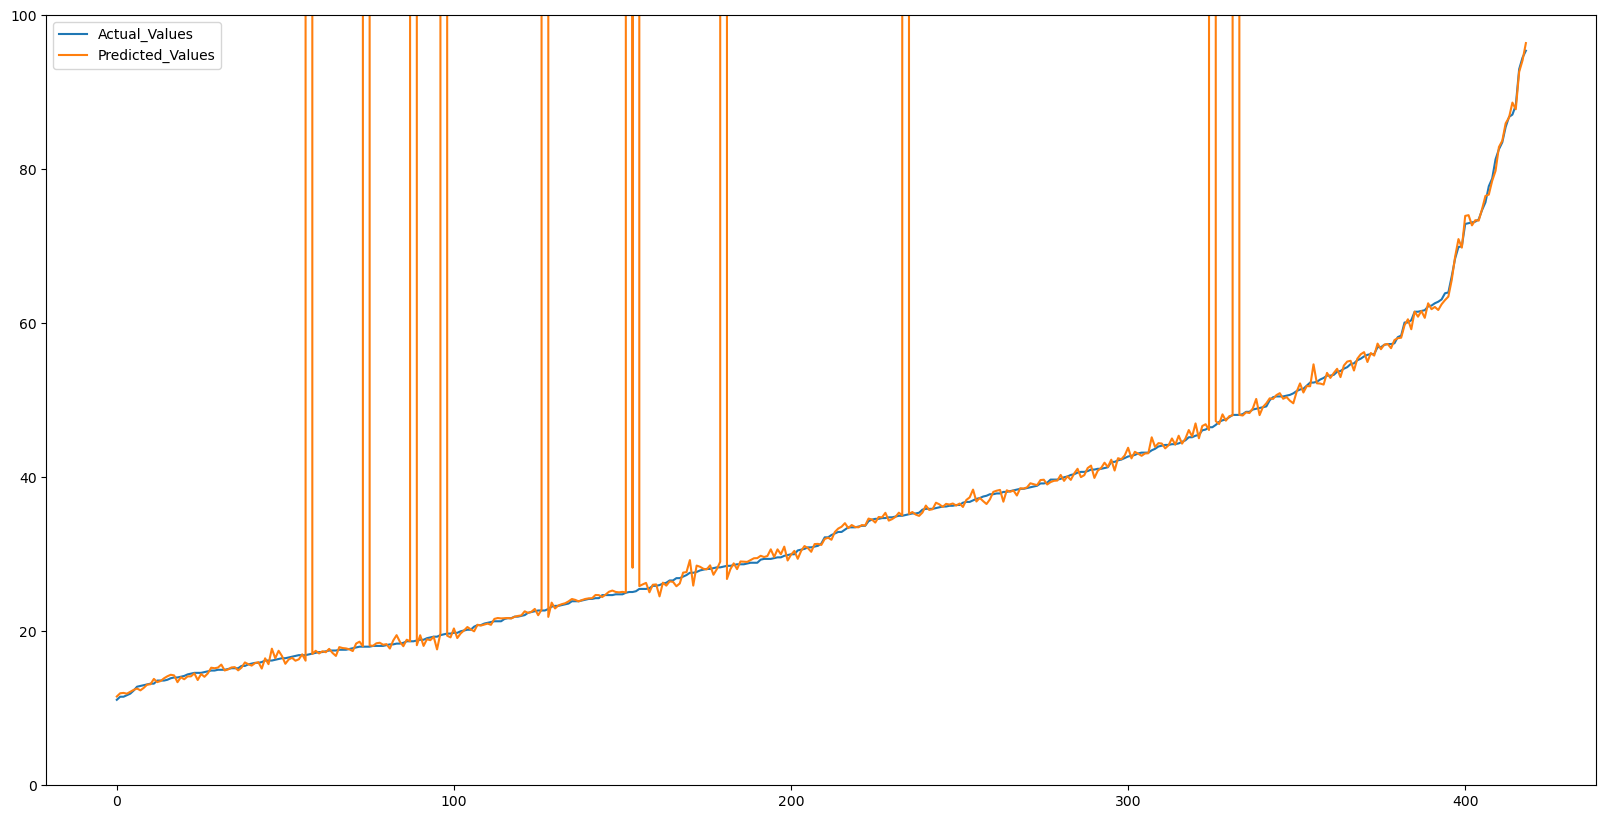

In [367]:
new_df.sort_values('Actual_Values', inplace=True)
new_df.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=new_df, dashes=False)
ax.set_ylim(0, 100)
plt.show()

In [368]:
# The mean absolute error is the sum of absolute errors over the length of observations / predictions.
# MAE output is non-negative floating point. The best value is 0.0.
print(mean_absolute_error(y_test, y_pred))

# In statistics, the mean squared error (MSE) measures the average of the squares of the errors.
# A non-negative floating point value (the best value is 0.0)
print(mean_squared_error(y_test, y_pred))

# The eigenvalues in PCA tell you how much variance can be explained by its associated eigenvector. Therefore, the highest eigenvalue indicates the highest variance in the data was observed in the direction of its eigenvector.
# This way you end up with a "percentage of variance" for each eigenvector.
print(explained_variance_score(y_test, y_pred))

5566613415.100101
1.1803840506620363e+21
-3.8707292129290706e+18


In [369]:
inputData = df.columns.tolist()
outputData = inputData[2:7]
for i in outputData: inputData.remove(i)
outputData = outputData[0]
print(outputData)

Score_Result


In [370]:
X_train, X_test, y_train, y_test = train_test_split(df[inputData], df[outputData], test_size=0.3, random_state=789)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(y_pred[:5])

[32.04394531 15.49316406 62.48242188 14.01855469 76.62109375]


In [371]:
new_df = pd.DataFrame({'Actual_Values': y_test.to_numpy(), 'Predicted_Values': y_pred})
print(new_df.head(10))

   Actual_Values  Predicted_Values
0           29.3      3.204395e+01
1           19.8      1.549316e+01
2           45.4      6.248242e+01
3           18.9      1.401855e+01
4           61.5      7.662109e+01
5           48.1      2.721021e+11
6           17.5      2.515918e+01
7           52.3      5.652441e+01
8           29.6      2.970898e+01
9           38.5      4.246875e+01


In [372]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

7121493927.393057
1.931942534299445e+21
-6.335252839812263e+18


In [373]:
inputData = df.columns.tolist()
outputData = inputData[2]
inputData.remove(outputData)
inputData.remove("Rank")

classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(kernel="linear"),
    RandomForestRegressor(),
    ExtraTreesRegressor()
]

results = []
for classifier in classifiers:
    k_fold = KFold(n_splits=5, random_state=123, shuffle=True)
    cv_results = cross_val_score(classifier,
                                 df[inputData],
                                 df[outputData],
                                 cv=k_fold,
                                 scoring='neg_mean_absolute_error'
                                 )
    print(f'{type(classifier).__name__ :>30}: {cv_results.mean():1.4f}')
    results.append([type(classifier).__name__, abs(cv_results.mean())])

df_result = pd.DataFrame(results, columns=['Name', 'MAE'])
print(df_result)

              LinearRegression: -2464913336.5611
         DecisionTreeRegressor: -1.8551
                           SVR: -0.3991
         RandomForestRegressor: -1.1467
           ExtraTreesRegressor: -0.9266
                    Name           MAE
0       LinearRegression  2.464913e+09
1  DecisionTreeRegressor  1.855113e+00
2                    SVR  3.991208e-01
3  RandomForestRegressor  1.146677e+00
4    ExtraTreesRegressor  9.265852e-01


2464913336.5611176
1.8551131592421914
0.39912079734259287
1.1466773374295953
0.9265851510496674


(0.0, 2.0)

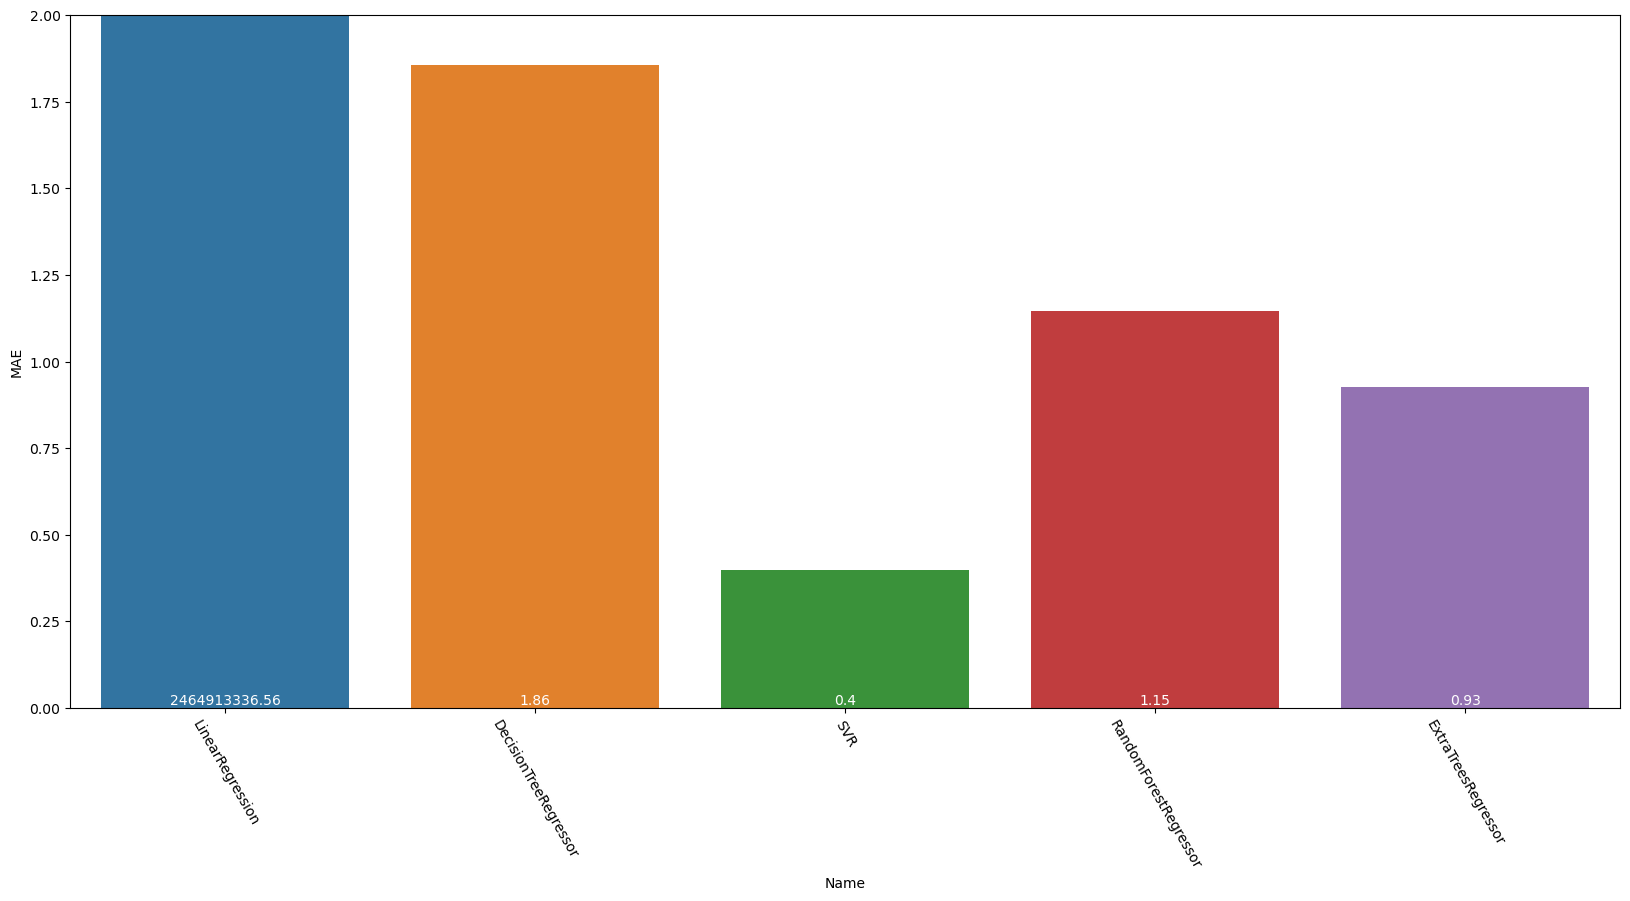

In [374]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 9

barplot = sns.barplot(data=df_result, x="Name", y="MAE")

for i, row in df_result.iterrows():
  print(row['MAE'])
  barplot.text(i, 0.01, round(row['MAE'], 2),
            color='white', ha='center')

barplot.tick_params(axis='x', rotation=-60)
barplot.set_ylim(0, 2)

In [375]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['mse', 'mae'], 'max_depth': [5, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2']}

clf = GridSearchCV(RandomForestRegressor(),
                         params,
                         cv=10,
                         scoring='r2')

clf.fit(df[inputData], df[outputData])

print('Best params settings:', clf.best_params_)
print('Best result:', clf.best_score_)
print('Best use in code is:', clf.best_estimator_)

/Users/gregorsulcer/.conda/envs/tz4/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/gregorsulcer/.conda/envs/tz4/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/gregorsulcer/.conda/envs/tz4/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/gregorsulcer/.conda/envs/tz4/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto

Best params settings: {'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto'}
Best result: -1.7442247105665847
Best use in code is: RandomForestRegressor(criterion='mse', max_depth=20, max_features='auto')
